# <p style="background-color:#32936f;font-family:inter;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Lung Cancer Predictions</p>

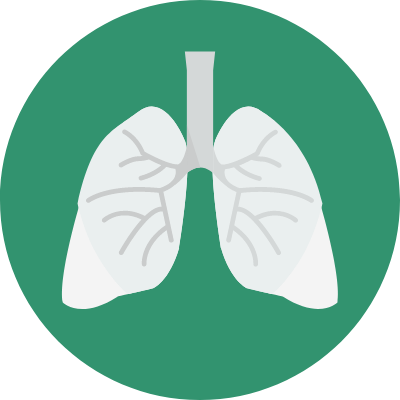
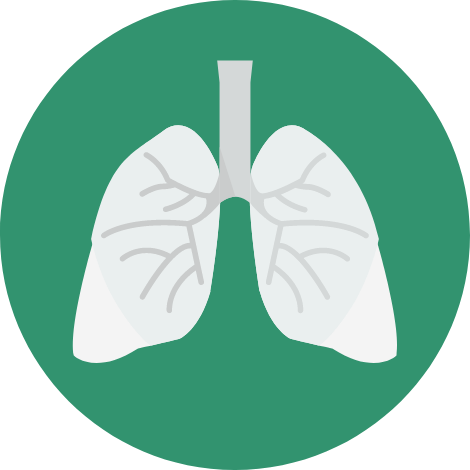

# <span style="color:#32936f;"> Importing Libraries </span>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

# <span style="color:#32936f;"> Loading up the data </span>

In [ ]:
data = pd.read_csv("../input/lung-cancer/survey lung cancer.csv")
data.head()

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.isna().sum()

In [ ]:
data["LUNG_CANCER"].unique()

In [ ]:
data["GENDER"].unique()

In [ ]:
# Mapping numeric values to non-numeric values

data['GENDER'] = data['GENDER'].map({'F': 0, 'M': 1})

data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [ ]:
data.dtypes

In [ ]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

In [ ]:
pal = ["#395e66","#387d7a","#32936f","#26a96c","#2bc016"]
custom_palette(pal)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap=pal, cbar=False, linewidths=0.5, linecolor='grey');

In [ ]:
print ('Total Healthy Patients : {} '.format(data.LUNG_CANCER.value_counts()[0]))
print ('Total Suspected Patients : {} '.format(data.LUNG_CANCER.value_counts()[1]))

In [ ]:
values = data['LUNG_CANCER'].value_counts().tolist()
names = list(dict(data['LUNG_CANCER'].value_counts()).keys())

px.pie(data, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

In [ ]:
x = data['LUNG_CANCER'].value_counts().index.tolist()
y = data['LUNG_CANCER'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=["firebrick", "green"], color_discrete_map="identity",
             labels={
                'x': 'LUNG_CANCER',
                'y': 'count'
                },)
fig.show()

In [ ]:
plt.style.use("seaborn")
data.hist(figsize=(25,20), color=pal[3], bins=15);

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = data, palette = pal)
plt.xticks(rotation=90, fontsize=18)
plt.show()

In [ ]:
sns.kdeplot(x=data["GENDER"], y=data["AGE"], hue =data["LUNG_CANCER"], palette="crest");
plt.show()

In [ ]:
for i in data:
    sns.swarmplot(x = data["LUNG_CANCER"], y = data[i], color = "black", alpha = 0.8)
    sns.boxenplot(x = data["LUNG_CANCER"], y = data[i], palette="crest")
    plt.show()   

# <span style="color:#32936f;"> Splitting the data into training and test datasets </span>
Here, we are trying to predict whether the patient has Lung Cancer or not using the given data. Hence, `LUNG_CANCER` will be the y label and rest of the data will be the X or the input data.

In [ ]:
# X data
X = data.drop("LUNG_CANCER", axis=1)
X.head()

In [ ]:
# y data
y = data["LUNG_CANCER"]
y.head()

In [ ]:
# Adding randomized samples to the data as the data is imbalanced

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train_res, palette=pal)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test)

In [ ]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Data after Scaling", fontsize=25, y=1.02)
sns.boxenplot(data = X_train, palette = pal)
plt.show()

# <span style="color:#32936f;"> Linear Regression </span>

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

# <span style="color:#32936f;"> Random Forest Classifier </span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

In [ ]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

In [ ]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

# <span style="color:#32936f;"> K Neighbors Classifier </span>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

In [ ]:
# Confustion Matrix 

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

# <span style="color:#32936f;"> Decision Tree Classifier </span>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

In [ ]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

In [ ]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_dtc))

# <span style="color:#32936f;"> Gradient Boosting Classifier </span>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

In [ ]:
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_gb))

# <span style="color:#32936f;"> XGB Classifier </span>

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
XGBClassifierScore = xgb.score(X_test,y_test)
print("Accuracy obtained by XGB Classifier model:",XGBClassifierScore*100)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for XGB Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

In [ ]:
plt.style.use("seaborn")

x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier",
     "XGB Classifier"]

y = [LinearRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore, 
     XGBClassifierScore]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y, palette=pal);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)
plt.show()